1000000000000.0 42417289956.49776
100000000000.0 424172901.5796462
10000000000.0 4241731.029576732
1000000000.0 42419.31519046502
100000000.0 426.10930594840323
10000000.0 5.891751479957237
1000000.0 0.6757266920985661
100000.0 0.16859217445719885
10000.0 0.023760087433166793
1000.0 0.0024848626050702856
100.0 0.0002496356468021153
10.0 2.4975122926431814e-05


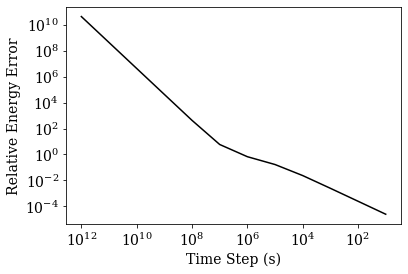

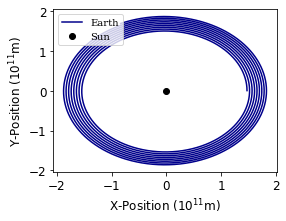

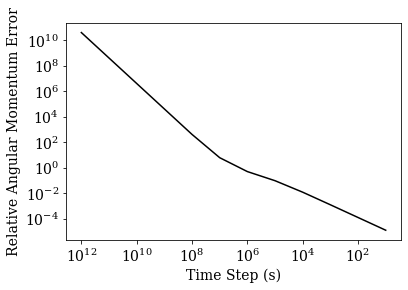

In [1]:
# Analytical Solution
import numpy as np
import matplotlib.pyplot as plt

# Initial Postions
x = 1.496e+11
y = 0
z = 0
Vx = 0
Vy = 30000
Vz = 0

# Parameters
M = 1.989e+30
G = 6.67e-11

# setting the distance and the angular velocity
r = (x**2 + y**2 + z**2)**0.5
phi_dot = (x*Vy - Vx*y)/(x**2 + y**2)

#computing the ang mom and energy
J = r**2 * phi_dot
E = J**2/(2*r**2) - G*M/r

# computing semi major and ecc
a = -(G*M)/(2*E)
e = (1 + 2 * E * J**2/(G*M)**2)**0.5

# function for the radial distance
def orbit(a,e,phi):
    return a*(1-e**2)/(1+e*np.cos(phi))

# arrays of the angle and r 
phi = np.linspace(0, 2*np.pi, 1000)
r_val = orbit(a,e,phi)

plt.polar(phi,r_val)
plt.xlabel('phi')
plt.ylabel('r')

# regular Euler integrator
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

# setting the parameters
N = 10*31.6e+6
G = 6.67e-11
M = 1.989e+30
mu_e = G*M
h_e = 13000

#initialize arrays for the positions and velocities
x_earth = []
y_earth = []
z_earth = []
Vx_earth = []
Vy_earth = []
Vz_earth = []
r_earth =[]
t_earth = 0 
energy = []
time = []

#initial conditions
x_e = 147093162898.2
y_e = 0
z_e = 0
Vx_e = 0
Vy_e = 30290
Vz_e = 0

energy = []
time = []
Ei = (Vy_e)**2/2 - mu_e/x_e

# euler integrator to determine the orbit
while t_earth < N:

    r_e = np.sqrt(x_e**2 + y_e**2 + z_e**2)
    r_earth.append(r_e) 
    a_x = mu_e/r_e**3 * x_e
    a_y = mu_e/r_e**3 * y_e
    a_z = mu_e/r_e**3 * z_e
    
    x_e = x_e + h_e * Vx_e
    Vx_e = Vx_e - h_e * a_x    
    x_earth.append(x_e)
    Vx_earth.append(Vx_e)
    y_e = y_e + h_e * Vy_e      
    Vy_e = Vy_e - h_e * a_y  
    y_earth.append(y_e)
    Vy_earth.append(Vy_e)

    z_e = z_e + h_e * Vz_e
    Vz_e = Vz_e - h_e * a_z
    z_earth.append(z_e)
    Vz_earth.append(Vz_e)

    t_earth = t_earth + h_e


x_earth = np.array(x_earth) * 1e-11
y_earth = np.array(y_earth) * 1e-11

plt.figure(1)
fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(1, 1, 1)
plt.plot(x_earth,y_earth, label ='Earth', color = 'darkblue')
plt.xlabel('X-Position ($10^{11}$m)',fontsize=12)
plt.ylabel('Y-Position ($10^{11}$m)',fontsize=12)
plt.rc('font', family='serif')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.plot(0,0,'ko',label='Sun')
plt.legend(loc="upper left")
plt.savefig('10000orbit.png',dpi=300, bbox_inches='tight')

# import packages
import matplotlib.pyplot as plt
import numpy as np

# Set constant paramters that will be used throughout
period_m = 3.154e+7
G = 6.67e-11
M = 1.989e+30
mu = G*M


interval = np.logspace(12,1,12)
energy = []
ang = []

for i in range(len(interval)):

    dt = interval[i]
    
    # initialise the empty lists to be appended into
    x_vals = []
    y_vals = []
    z_vals = []
    Vx_vals = []
    Vy_vals = []
    Vz_vals = []
    time = []
    t = 0

    #reset initial conditions
    x = 147093162898.2
    y = 0
    z = 0
    Vx = 0
    Vy = 30290
    Vz = 0
    
    r = (x**2 + y**2 + z**2)**0.5
    Ei = (Vy)**2/2 - mu/x
    phi_dot = (x*Vy - Vx*y)/(x**2 + y**2)
    Ji = r**2 * phi_dot

    # use the most efficient method with minimal steps
    while t < period_m:
        
        r = (x**2 + y**2 + z**2)**0.5
        a_x = -mu/r**3 * x
        a_y = -mu/r**3 * y
        a_z = -mu/r**3 * z

        x = x + dt * Vx
        Vx = Vx + dt * a_x

        y = y + dt * Vy
        Vy = Vy + dt * a_y
        
        z = z + dt * Vz
        Vz = Vz + dt * a_z

        t = t + dt
    
    #final energy calculation
    vf = np.sqrt(Vx**2 + Vy**2)
    Ef = vf**2/2 - mu/np.sqrt(x**2+y**2)
    
    phi_dot = (x*Vy - Vx*y)/(x**2 + y**2)
    r = np.sqrt(x**2+y**2+z**2)
    Jf = r**2 * phi_dot
    
    print(dt,abs(Ef-Ei)/abs(Ei))
    energy.append(abs(Ef-Ei)/abs(Ei))
    ang.append(abs(Jf-Ji)/abs(Ji))

    
plt.figure(1)
plt.plot(interval,energy,color='black')
plt.xscale('log')
plt.yscale('log')
plt.gca().invert_xaxis()
plt.xlabel('Time Step (s)',fontsize=14)
plt.ylabel('Relative Energy Error',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.rc('font', family='serif')
plt.savefig('energyerrorreg.png',dpi=300, bbox_inches='tight')
plt.show()

plt.figure(1)
plt.plot(interval,ang,color='black')
plt.xscale('log')
plt.yscale('log')
plt.gca().invert_xaxis()
plt.xlabel('Time Step (s)',fontsize=14)
plt.ylabel('Relative Angular Momentum Error',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.rc('font', family='serif')
plt.savefig('angreg.png',dpi=300, bbox_inches='tight')
plt.show()

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

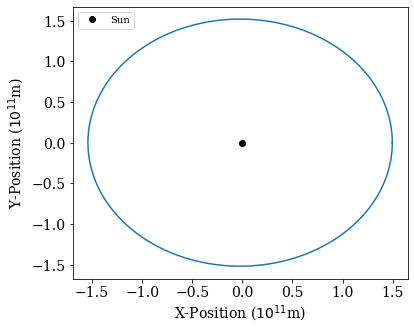

In [6]:
# Analytical Solution
import numpy as np
import matplotlib.pyplot as plt

# Initial Postions
x = 1.496e+11
y = 0
z = 0
Vx = 0
Vy = 30000
Vz = 0

# Parameters
M = 1.989e+30
G = 6.67e-11

# setting the distance and the angular velocity
r = (x**2 + y**2 + z**2)**0.5
phi_dot = (x*Vy - Vx*y)/(x**2 + y**2)

#computing the ang mom and energy
J = r**2 * phi_dot
E = J**2/(2*r**2) - G*M/r

# computing semi major and ecc
a = -(G*M)/(2*E)
e = (1 + 2 * E * J**2/(G*M)**2)**0.5

# function for the radial distance
def orbit(a,e,phi):
    return a*(1-e**2)/(1+e*np.cos(phi))

# arrays of the angle and r 
phi = np.linspace(0, 2*np.pi, 1000)
r_val = orbit(a,e,phi)

x = r_val * np.cos(phi) * 1e-11
y = r_val * np.sin(phi) * 1e-11


plt.figure(2)
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(1, 1, 1)
plt.plot(x,y)
plt.legend(loc = 'upper left')
plt.xlabel('X-Position ($10^{11}$m)',fontsize=14)
plt.ylabel('Y-Position ($10^{11}$m)',fontsize=14)
plt.rc('font', family='serif')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(0,0,'ko',label='Sun')
plt.legend(loc="upper left")
plt.savefig('merc123.png',dpi=300, bbox_inches='tight')
plt.show()